In [1]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from nbc import NBC
from sklearn.linear_model import LogisticRegression as LG

iris = load_iris()
X, y = iris['data'], iris['target']
N, D = X.shape
Ntrain = int(0.8*N)
Xtrain = X[:Ntrain]
ytrain = y[:Ntrain]
Xtest = X[Ntrain:]
ytest = y[Ntrain:]

In [2]:
N_permutations = 200

def shuffle():
    shuffler = np.random.permutation(N)
    global Xtrain, ytrain, Xtest, ytest
    Xtrain = X[shuffler[:Ntrain]]
    ytrain = y[shuffler[:Ntrain]]
    Xtest = X[shuffler[Ntrain:]]
    ytest = y[shuffler[Ntrain:]]

def plot(nperms):
    nbc = NBC(['r','r','r','r'], 3)
    lg = LG(random_state=0, solver="liblinear")
    errors_nbc = [0] * 10
    errors_lg = [0] * 10

    def fit_nbc_and_lg():
        nonlocal errors_nbc, errors_lg
        for i in range(10):
            N_seg = int((i+1) / 10 * Ntrain)
            Xtrain_seg = Xtrain[:N_seg,:]
            ytrain_seg = ytrain[:N_seg]

            nbc.fit(Xtrain_seg, ytrain_seg)
            yhat_nbc = nbc.predict(Xtest)
            test_accuracy_nbc = np.mean(yhat_nbc == ytest)

            lg.fit(Xtrain_seg, ytrain_seg)
            yhat_lg = lg.predict(Xtest)
            test_accuracy_lg = np.mean(yhat_lg == ytest)

            errors_nbc[i] += 1 - test_accuracy_nbc
            errors_lg[i] += 1 - test_accuracy_lg

    for i in range(nperms):
        shuffle()
        fit_nbc_and_lg()
    errors_nbc = list(map(lambda x: x / nperms, errors_nbc))
    errors_lg = list(map(lambda x: x / nperms, errors_lg))
    plt.plot(list(range(10,101,10)), errors_nbc, "b-", list(range(10,101,10)), errors_lg, "r-")
    plt.xlabel("Percentage of training data used")
    plt.ylabel("Test error")
    plt.title("NBC (blue) vs. LG (red) averaged over {} experiments".format(N_permutations))


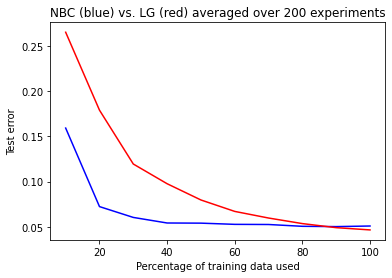

In [3]:
plot(N_permutations)